# 基于31个样本体能测试数据集的相关性分析案例

### 1.读取数据并计算协差阵和相关阵

In [7]:
# 读取数据
# 数据源自上海财经大学云文档网站，是本书的配套数据
library(readxl)
data = read_excel('.//AMSA_data//《应用多元统计分析》（第6版）Excel数据//examp3.4.2.xlsx')
head(data) #查看前几行

年龄,体重,肺活量,1.5英里跑的时间,休息时的脉搏,跑步时的脉搏,跑步时的最大脉搏
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
44,89.47,44.609,11.37,62,178,182
40,75.07,45.313,10.07,62,185,185
44,85.84,54.297,8.65,45,156,168
42,68.15,59.571,8.17,40,166,172
38,89.02,49.874,9.22,55,178,180
47,77.45,44.811,11.63,58,176,176


In [4]:
# 协方差矩阵
cov(data)

,年龄,体重,肺活量,1.5英里跑的时间,休息时的脉搏,跑步时的脉搏,跑步时的最大脉搏
年龄,27.159140,-10.136495,-8.456265,1.364710,-6.119355,-18.051613,-20.675269
体重,-10.136495,69.365039,-7.221051,1.658255,1.568204,15.498656,19.033720
肺活量,-8.456265,-7.221051,28.379385,-6.372547,-15.306418,-21.735238,-11.557478
1.5英里跑的时间,1.364710,1.658255,-6.372547,1.924918,4.609301,4.461247,2.874763
休息时的脉搏,-6.119355,1.568204,-15.306418,4.609301,68.797849,27.038710,19.573118
跑步时的脉搏,-18.051613,15.498656,-21.735238,4.461247,27.038710,105.103226,87.350538
跑步时的最大脉搏,-20.675269,19.033720,-11.557478,2.874763,19.573118,87.350538,83.980645


In [6]:
# 相关系数矩阵
cor(data)

,年龄,体重,肺活量,1.5英里跑的时间,休息时的脉搏,跑步时的脉搏,跑步时的最大脉搏
年龄,1.0000000,-0.23353903,-0.3045924,0.1887453,-0.14156640,-0.3378703,-0.4329159
体重,-0.2335390,1.00000000,-0.1627528,0.1435076,0.02270099,0.1815163,0.2493812
肺活量,-0.3045924,-0.16275285,1.0000000,-0.8621949,-0.34640540,-0.3979742,-0.2367402
1.5英里跑的时间,0.1887453,0.14350758,-0.8621949,1.0000000,0.40053599,0.3136478,0.2261030
休息时的脉搏,-0.1415664,0.02270099,-0.3464054,0.4005360,1.00000000,0.3179732,0.2575034
跑步时的脉搏,-0.3378703,0.18151633,-0.3979742,0.3136478,0.31797319,1.0000000,0.9297538
跑步时的最大脉搏,-0.4329159,0.24938123,-0.2367402,0.2261030,0.25750341,0.9297538,1.0000000


### 2.基于数据可视化的统计分析

corrplot 0.92 loaded



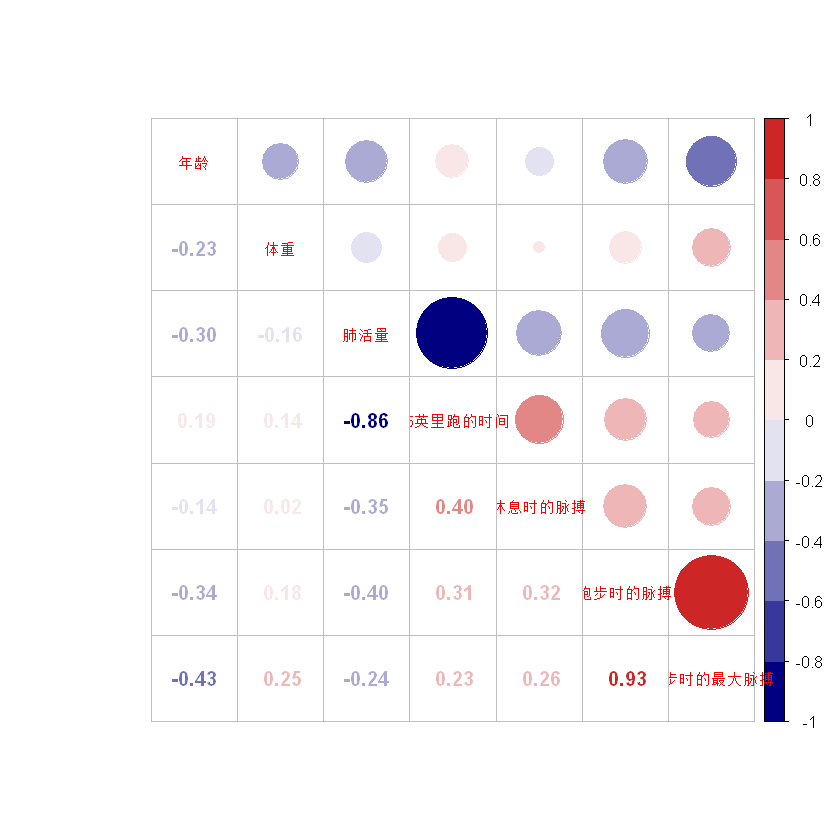

In [8]:
# 对相关系数矩阵进行可视化分析
# 绘制热力图
b<-cor(data)
library("corrplot")
col=colorRampPalette(c("navy", "white", "firebrick3"))
corrplot(b,type="upper",col=col(10),tl.pos="d",tl.cex=0.75) 
corrplot(b,add=TRUE, type="lower", method="number",diag=FALSE,tl.pos="n", cl.pos="n",col=col(10))

图片的左下三角是对应变量的相关系数值，而上三角可以直观清晰地观察到（线性）相关性的大小。从图中可以得知，肺活量大小和1.5英里跑的时间呈较大的负相关性，而跑步时的脉搏和跑步时的最大脉搏呈现较强的正相关性。

然而当样本容量很小时，计算出的相关系数不一定能反映总体的真实相关关系，而且，当总体不相关时，利用样本数据计算出的也不一定等于零，有时还可能较大，这就会产生虚假相关现象。为判断样本相关系数对总体相关程度的代表性，需要对相关系数进行显著性检验。若在统计上是显著的，说明它可以作为总体相关程度的代表值，否则不能作为总体相关程度的代表值。因此，这里我们也尝试用可视化的方法计算出fisher提出的t检验结果。

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'PerformanceAnalytics'


The following object is masked from 'package:graphics':

    legend




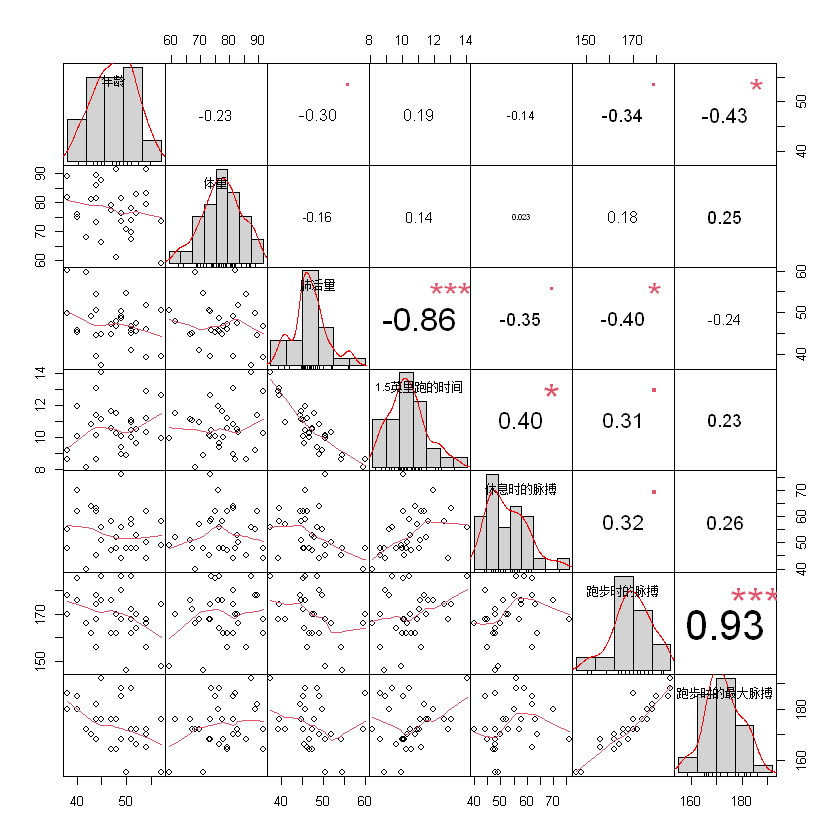

In [9]:
# 绘制特征分析图
library(PerformanceAnalytics)
chart.Correlation(data,histogram = TRUE,pch=19)

在该图的右上三角形中，两个‘*’表明检验P值小于0.01，三个‘*’表明P值小于0.001。因此我们有统计依据地认为肺活量大小和1.5英里跑的时间之间的负相关性和跑步时的脉搏和跑步时的最大脉搏呈现的正相关性是在统计上显著的。

在该图的右下三角形中，我绘制了两两变量之间的散点图，可以清楚的看到，肺活量大小和1.5英里跑的时间两个变量组成的三点确集中分布于一条向右下倾斜的直线左右，而跑步时的脉搏和跑步时最大脉搏两个变量则同理。显然，这也是具有实际意义的。

### 3.尝试使用计算互信息的方法

互信息描述了两个变量联合分布和两个边缘函数乘积的相对熵。这样的话，如果两个变量的相对熵是零的话，那么这两个变量就是相互独立的。

In [57]:
# 计算互信息
library(infotheo)
mi<-function(mylist1,mylist2){
  mylist1 = round(mylist1,0)  # 不是离散数据不能计算互信息，只好进行粗略估计
  mylist2 = round(mylist2,0) 
  return(entropy(mylist1)+entropy(mylist2)-entropy(cbind(mylist1,mylist2)))
}

# 1尝试计算休息时脉搏和体重之间的互信息
pvalue1 = mi(data[,2],data[,5])
# 2尝试计算肺活量大小和1.5英里跑的时间之间的互信息
pvalue2 = mi(data[,3],data[,4])

print(pvalue1)
print(pvalue2)

[1] 2.304172
[1] 1.166723


额，但是计算出来的数值非零，说明它们都不独立。

### 4.总结

由于相关性系数矩阵可以通俗的理解为标准化了的协方差阵，因此我基于相关阵对数据进行了可视化分析，又考虑到了样本随机性的影响，引入fisher提出的相关系数显著性检验方法进行统计检验，在最后尝试了计算相对熵。最终我发现，肺活量大小和1.5英里跑的时间之间有强负相关性；跑步时的脉搏和跑步时的最大脉搏呈现强正相关性，这为我们的体育锻炼指导和体质测试安排提供了数理统计依据。

参考文献

[1] 贾俊平,何晓群,金勇进.统计学(第二版)[M].中国人民大学出版社,2004.